In [1]:
import pandas as pd
from tensorflow import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
def plot_graph(validation_data, training_data, graph_type):
    plt.clf()
    epochs = range(1, len(training_data) + 1)
    plt.plot(epochs, training_data, 'r', label='Training '+graph_type)
    plt.plot(epochs, validation_data, 'b', label='Validation '+graph_type)
    plt.title('Training and validation '+graph_type)
    plt.xlabel('Epochs')
    plt.ylabel(graph_type)
    plt.legend()
    plt.show()

In [3]:
df = pd.read_csv('./train.csv')

In [4]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
pd.set_option("display.max_columns", None)

In [6]:
df['pixel2'].max()

0

In [7]:
Y = df['label']

In [8]:
Y = to_categorical(Y)

In [9]:
X = df.drop(columns=['label'])

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [11]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(784,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=12, validation_split=0.25, epochs=10)

2022-01-10 21:40:29.343364: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
2100/2100 [==============================] - 4s 2ms/step - loss: 1.3624 - accuracy: 0.7051 - val_loss: 0.5611 - val_accuracy: 0.8565
Epoch 2/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.4482 - accuracy: 0.8808 - val_loss: 0.3707 - val_accuracy: 0.9030
Epoch 3/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.3276 - accuracy: 0.9124 - val_loss: 0.3926 - val_accuracy: 0.8979
Epoch 4/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2676 - accuracy: 0.9285 - val_loss: 0.2546 - val_accuracy: 0.9340
Epoch 5/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2232 - accuracy: 0.9398 - val_loss: 0.2666 - val_accuracy: 0.9330
Epoch 6/10
2100/2100 [==============================] - 3s 2ms/step - loss: 0.1937 - accuracy: 0.9475 - val_loss: 0.2197 - val_accuracy: 0.9421
Epoch 7/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1708 - accuracy: 0.9541 - val_loss: 0.2367 - val_accuracy:

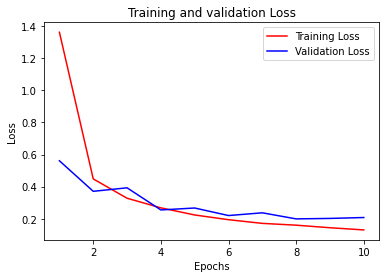

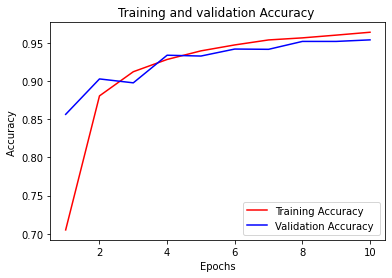

In [12]:
history = history.history
plot_graph(history['val_loss'], history['loss'], 'Loss')
plot_graph(history['val_accuracy'], history['accuracy'], 'Accuracy ')

In [13]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(784,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=16, validation_data=(X_test, Y_test), epochs=15)

Epoch 1/15
2100/2100 [==============================] - 4s 2ms/step - loss: 2.1288 - accuracy: 0.2661 - val_loss: 1.7332 - val_accuracy: 0.3427
Epoch 2/15
2100/2100 [==============================] - 3s 2ms/step - loss: 1.6001 - accuracy: 0.3753 - val_loss: 1.5321 - val_accuracy: 0.3817
Epoch 3/15
2100/2100 [==============================] - 3s 1ms/step - loss: 1.1536 - accuracy: 0.5840 - val_loss: 0.6856 - val_accuracy: 0.7768
Epoch 4/15
2100/2100 [==============================] - 3s 1ms/step - loss: 0.5144 - accuracy: 0.8238 - val_loss: 0.4495 - val_accuracy: 0.8324
Epoch 5/15
2100/2100 [==============================] - 3s 1ms/step - loss: 0.3907 - accuracy: 0.8491 - val_loss: 0.4150 - val_accuracy: 0.8476
Epoch 6/15
2100/2100 [==============================] - 3s 1ms/step - loss: 0.3245 - accuracy: 0.9024 - val_loss: 0.3217 - val_accuracy: 0.9213
Epoch 7/15
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2434 - accuracy: 0.9368 - val_loss: 0.2841 - val_accuracy:

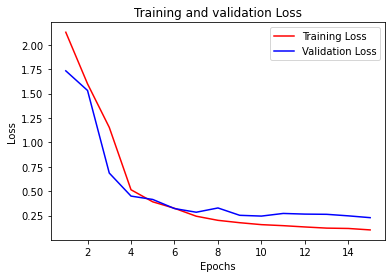

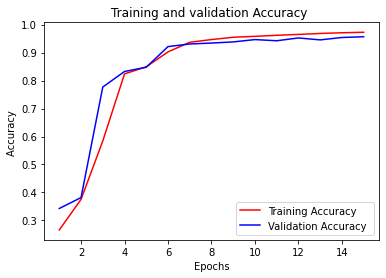

In [14]:
history = history.history
plot_graph(history['val_loss'], history['loss'], 'Loss')
plot_graph(history['val_accuracy'], history['accuracy'], 'Accuracy ')

In [15]:
model.evaluate(X_test, Y_test)

263/263 [==============================] - 0s 1ms/step - loss: 0.2285 - accuracy: 0.9567


[0.22848071157932281, 0.9566666483879089]

In [16]:
prediction_data = pd.read_csv('./test.csv')

In [17]:
predicted_values = model.predict(prediction_data)

#### Write predicted values to file

In [18]:
len(predicted_values)

28000

In [19]:
counter = 0
with (open('./digit-prediction1.csv', 'w')) as file:
    writer = csv.writer(file)
    writer.writerow(['ImageId', 'Label'])
    for i in range(len(predicted_values)):
        counter = counter + 1
        writer.writerow([counter, np.argmax(predicted_values[i])])

In [20]:
Y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [21]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(784,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=64, validation_data=(X_test, Y_test), epochs=40)

Epoch 1/40
525/525 [==============================] - 2s 3ms/step - loss: 2.8210 - accuracy: 0.6374 - val_loss: 0.7341 - val_accuracy: 0.7913
Epoch 2/40
525/525 [==============================] - 1s 2ms/step - loss: 0.5754 - accuracy: 0.8399 - val_loss: 0.4869 - val_accuracy: 0.8627
Epoch 3/40
525/525 [==============================] - 1s 2ms/step - loss: 0.3830 - accuracy: 0.8944 - val_loss: 0.3708 - val_accuracy: 0.8943
Epoch 4/40
525/525 [==============================] - 1s 2ms/step - loss: 0.2884 - accuracy: 0.9186 - val_loss: 0.3330 - val_accuracy: 0.9118
Epoch 5/40
525/525 [==============================] - 1s 2ms/step - loss: 0.2334 - accuracy: 0.9332 - val_loss: 0.2695 - val_accuracy: 0.9223
Epoch 6/40
525/525 [==============================] - 1s 2ms/step - loss: 0.1969 - accuracy: 0.9425 - val_loss: 0.2559 - val_accuracy: 0.9285
Epoch 7/40
525/525 [==============================] - 1s 2ms/step - loss: 0.1740 - accuracy: 0.9496 - val_loss: 0.2551 - val_accuracy: 0.9345
Epoch 

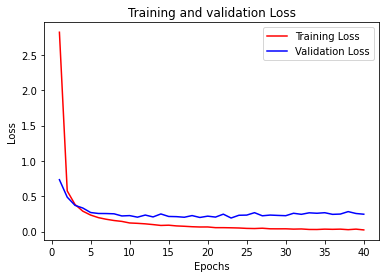

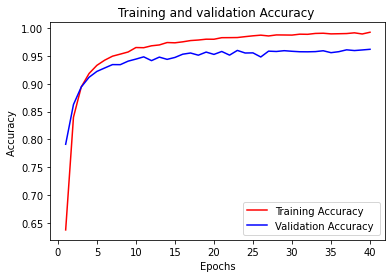

In [22]:
history = history.history
plot_graph(history['val_loss'], history['loss'], 'Loss')
plot_graph(history['val_accuracy'], history['accuracy'], 'Accuracy ')

In [23]:
predicted_values = model.predict(prediction_data)
counter = 0
with (open('./digit-prediction2.csv', 'w')) as file:
    writer = csv.writer(file)
    writer.writerow(['ImageId', 'Label'])
    for i in range(len(predicted_values)):
        counter = counter + 1
        writer.writerow([counter, np.argmax(predicted_values[i])])

In [24]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(784,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=32, validation_data=(X_test, Y_test), epochs=30)

Epoch 1/30
1050/1050 [==============================] - 3s 2ms/step - loss: 1.4731 - accuracy: 0.6277 - val_loss: 0.5881 - val_accuracy: 0.8260
Epoch 2/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4844 - accuracy: 0.8653 - val_loss: 0.3906 - val_accuracy: 0.8817
Epoch 3/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3139 - accuracy: 0.9130 - val_loss: 0.3339 - val_accuracy: 0.9124
Epoch 4/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2445 - accuracy: 0.9316 - val_loss: 0.2671 - val_accuracy: 0.9321
Epoch 5/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1999 - accuracy: 0.9447 - val_loss: 0.2103 - val_accuracy: 0.9437
Epoch 6/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1649 - accuracy: 0.9529 - val_loss: 0.2050 - val_accuracy: 0.9419
Epoch 7/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1437 - accuracy: 0.9583 - val_loss: 0.1965 - val_accuracy:

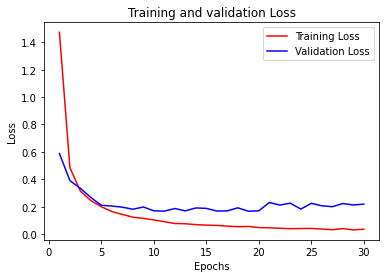

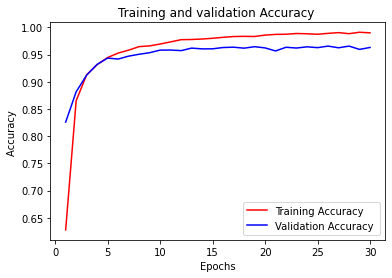

In [25]:
history = history.history
plot_graph(history['val_loss'], history['loss'], 'Loss')
plot_graph(history['val_accuracy'], history['accuracy'], 'Accuracy ')

In [26]:
predicted_values = model.predict(prediction_data)

In [27]:
counter = 0
with (open('./digit-prediction3.csv', 'w')) as file:
    writer = csv.writer(file)
    writer.writerow(['ImageId', 'Label'])
    for i in range(len(predicted_values)):
        counter = counter + 1
        writer.writerow([counter, np.argmax(predicted_values[i])])

#### Try scaling input parameters and re-model 

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
standard_scaler = StandardScaler()

In [30]:
Y = df['label']
Y = to_categorical(Y)
X = df.drop(columns=['label'])
X = standard_scaler.fit_transform(X)

In [31]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [33]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(units=30, activation='relu'))
# model.add(Dropout(0.7))
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history = model.fit(X_train, Y_train, batch_size=12, validation_data=(X_test, Y_test), epochs=20)

Epoch 1/20
2800/2800 [==============================] - 6s 2ms/step - loss: 0.6742 - categorical_accuracy: 0.7884 - val_loss: 0.2684 - val_categorical_accuracy: 0.9245
Epoch 2/20
2800/2800 [==============================] - 6s 2ms/step - loss: 0.4258 - categorical_accuracy: 0.8737 - val_loss: 0.2342 - val_categorical_accuracy: 0.9364
Epoch 3/20
2800/2800 [==============================] - 6s 2ms/step - loss: 0.3545 - categorical_accuracy: 0.8974 - val_loss: 0.1994 - val_categorical_accuracy: 0.9461
Epoch 4/20
2800/2800 [==============================] - 6s 2ms/step - loss: 0.3218 - categorical_accuracy: 0.9068 - val_loss: 0.1886 - val_categorical_accuracy: 0.9546
Epoch 5/20
2800/2800 [==============================] - 6s 2ms/step - loss: 0.2795 - categorical_accuracy: 0.9201 - val_loss: 0.1907 - val_categorical_accuracy: 0.9495
Epoch 6/20
2800/2800 [==============================] - 7s 2ms/step - loss: 0.2761 - categorical_accuracy: 0.9215 - val_loss: 0.1823 - val_categorical_accuracy:

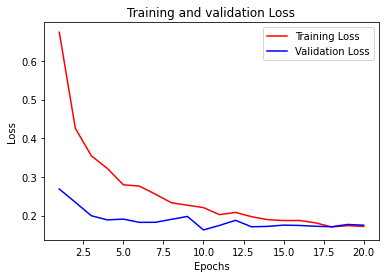

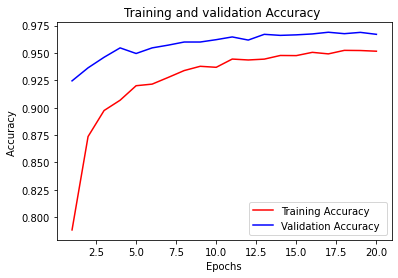

In [34]:
history = history.history
plot_graph(history['val_loss'], history['loss'], 'Loss')
plot_graph(history['val_categorical_accuracy'], history['categorical_accuracy'], 'Accuracy ')

In [35]:
predicted_values = model.predict(prediction_data)

counter = 0
with (open('./digit-prediction4.csv', 'w')) as file:
    writer = csv.writer(file)
    writer.writerow(['ImageId', 'Label'])
    for i in range(len(predicted_values)):
        counter = counter + 1
        writer.writerow([counter, np.argmax(predicted_values[i])])

#### This Talos implemnetation is commented as it did not have perofrm as expected and I could not train further at the moment

In [36]:
import talos

In [37]:
def mnst_model(x_train, y_train, x_val, y_val, params):
    model = Sequential()
    model.add(Dense(units=params['f_neuron'], activation=params['activation'], input_shape=(784,)))
    model.add(Dropout(0.5))
    model.add(Dense(units=params['s_neuron'], activation=params['activation']))
    # model.add(Dropout(0.7))
    model.add(Dense(units=params['t_neuron'], activation=params['activation']))
    model.add(Dropout(0.2))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(optimizer=params['optimizers'], loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    output = model.fit(X_train, Y_train, batch_size=params['batch_size'], validation_data=[x_val, y_val],
              epochs=params['epochs'], verbose=0)
    return output, model

In [38]:
params = {'activation':['relu'],
    'optimizers': ['Adam'],
    'batch_size': (10, 40, 5),
    'epochs': [10, 15, 20],
    'f_neuron' : [64, 128, 256, 512],
    's_neuron' : [64, 32, 16, 8],
    't_neuron' : [30, 20, 10, 5],
    }

In [39]:
# scan_obj = talos.Scan(X_train, Y_train, x_val=X_test, y_val=Y_test, params=params, model=mnst_model, experiment_name='nn')

In [40]:
# scan_obj

In [41]:
# bestmodel = scan_obj.best_model(metric='categorical_accuracy')

In [42]:
# bestmodel.summary()

In [43]:
# from talos import Evaluate, Predict

In [44]:
# e = Evaluate(scan_obj)
# e.evaluate(X_train, Y_train, asc=True, task='multi_label', metric='categorical_accuracy')

In [45]:
# e = Evaluate(scan_obj)
# e.evaluate(X_test, Y_test, asc=True, task='multi_label', metric='categorical_accuracy')

In [46]:
# p = Predict(scan_obj)
# predicted_values = p.predict(prediction_data, metric='categorical_accuracy', asc=True)

In [47]:
# counter = 0
# with (open('./digit-prediction.csv', 'w')) as file:
#     writer = csv.writer(file)
#     writer.writerow(['ImageId', 'Label'])
#     for i in range(len(predicted_values)):
#         counter = counter + 1
#         writer.writerow([counter, np.argmax(predicted_values[i])])

In [48]:
# bestmodel.